Generating multidimensional visualization examples...

1. Using synthetic data (8 dimensions, 3 classes):

2. Using Wine dataset (8 selected features):

Dataset shape: (178, 9)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols']
Classes: [0 1 2]

MULTIDIMENSIONAL DATA VISUALIZATIONS

1. Parallel Coordinates Plot:


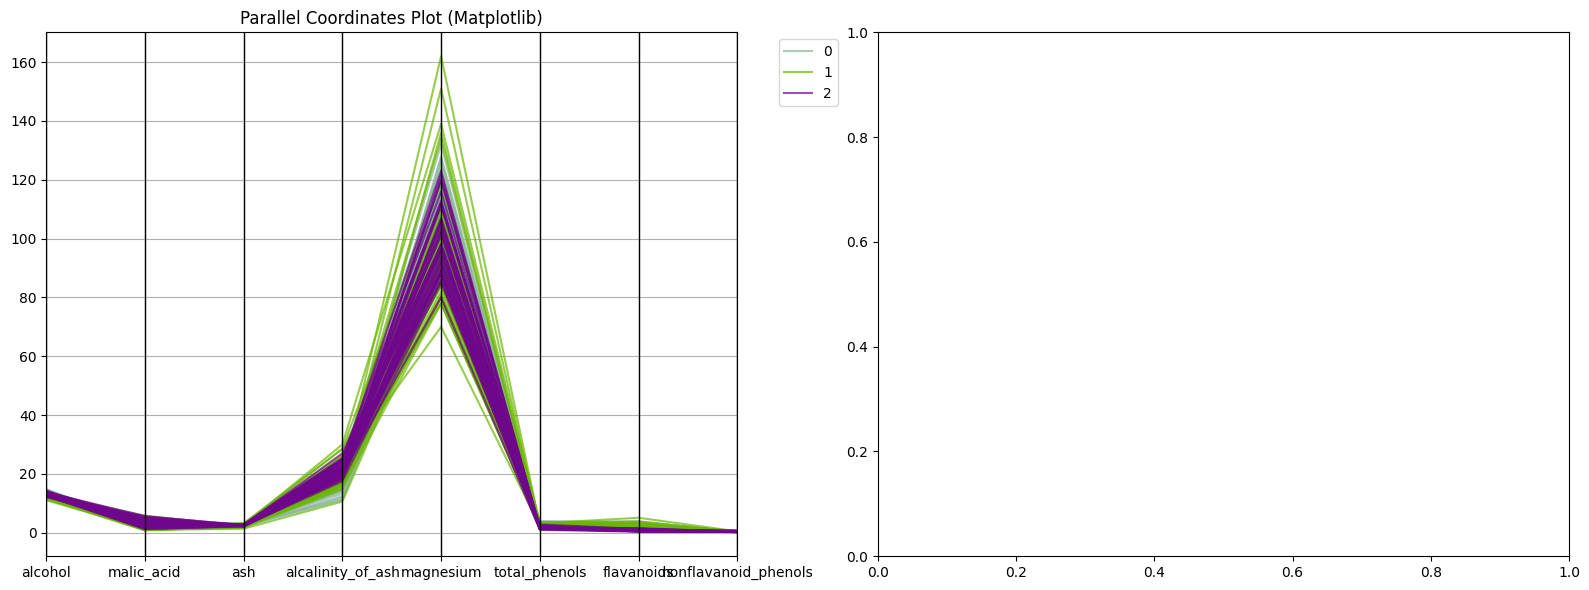


2. Radar/Spider Plot:


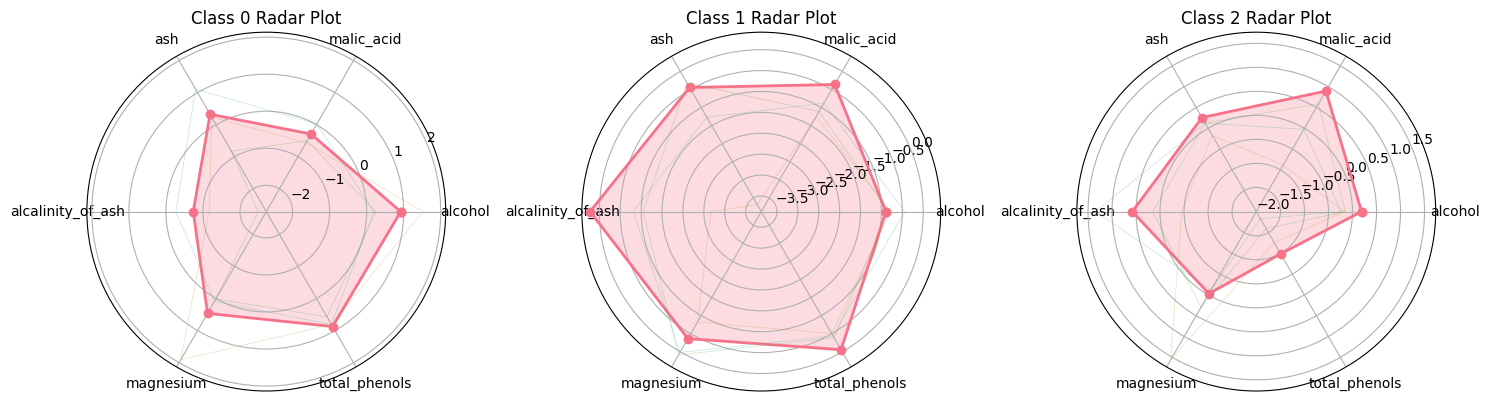


4. Correlation Heatmap:


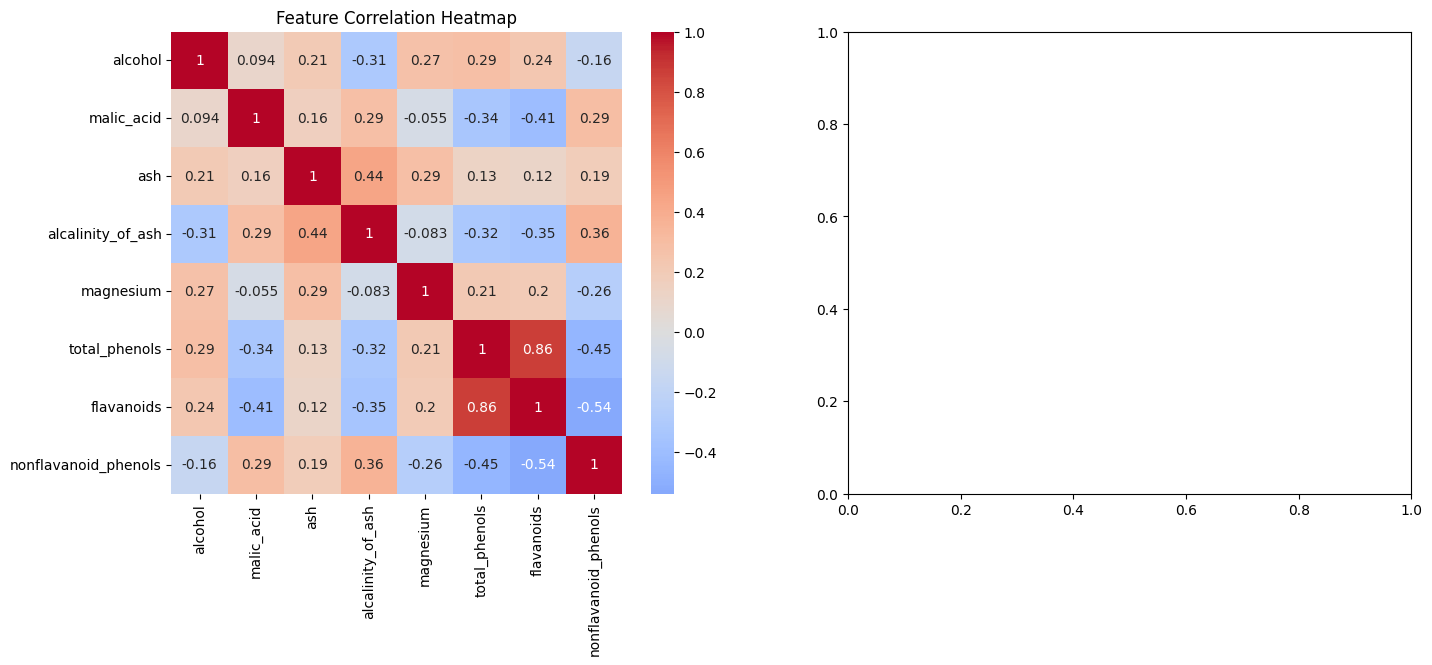

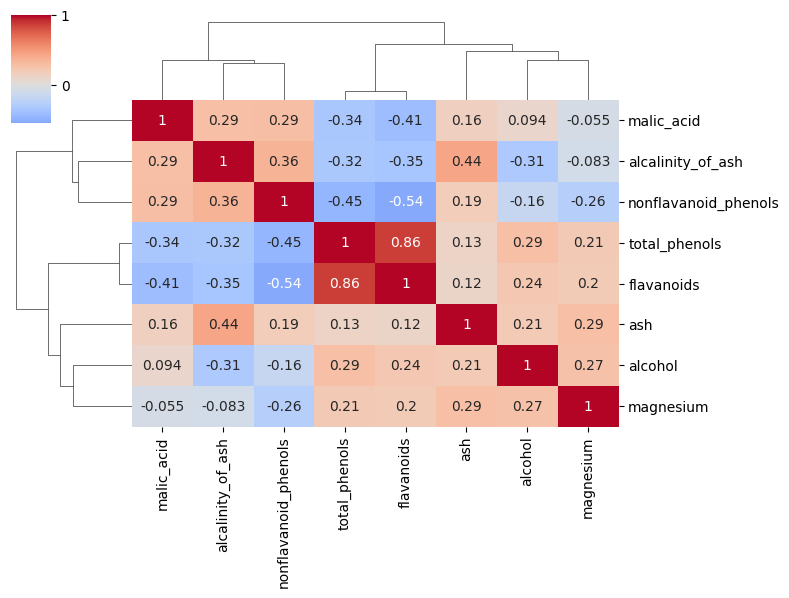


5. PCA Visualization:


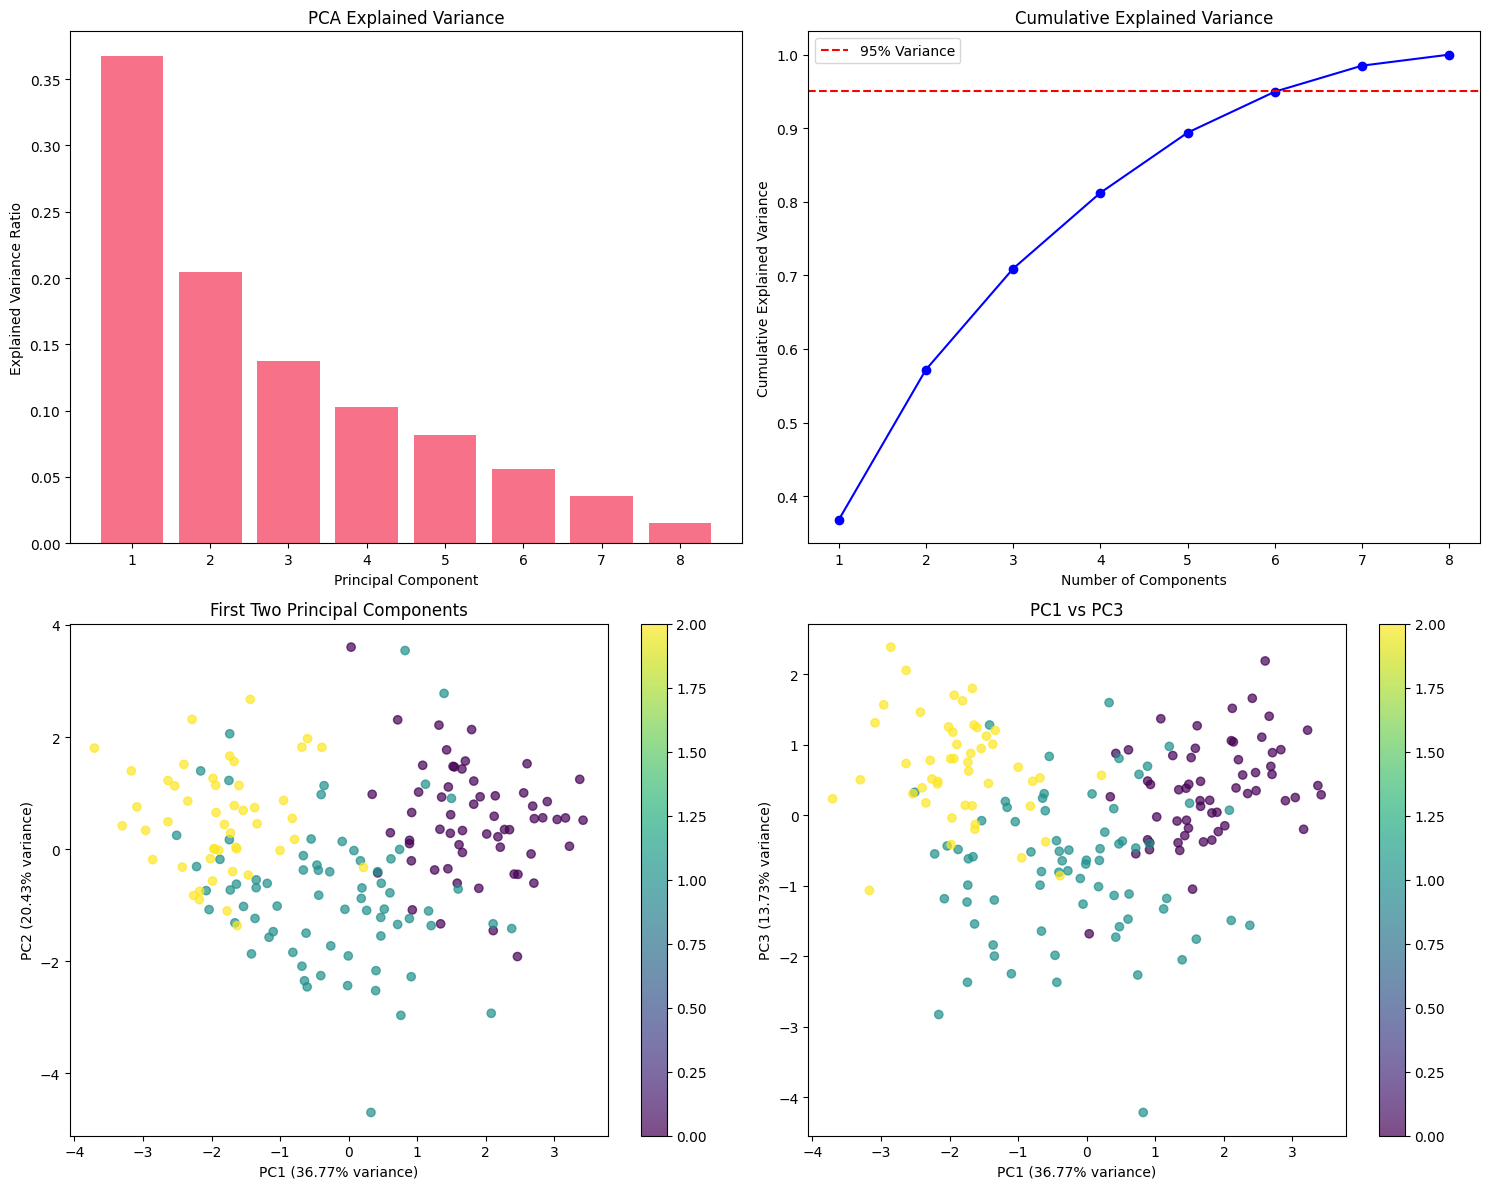


6. t-SNE Visualization:


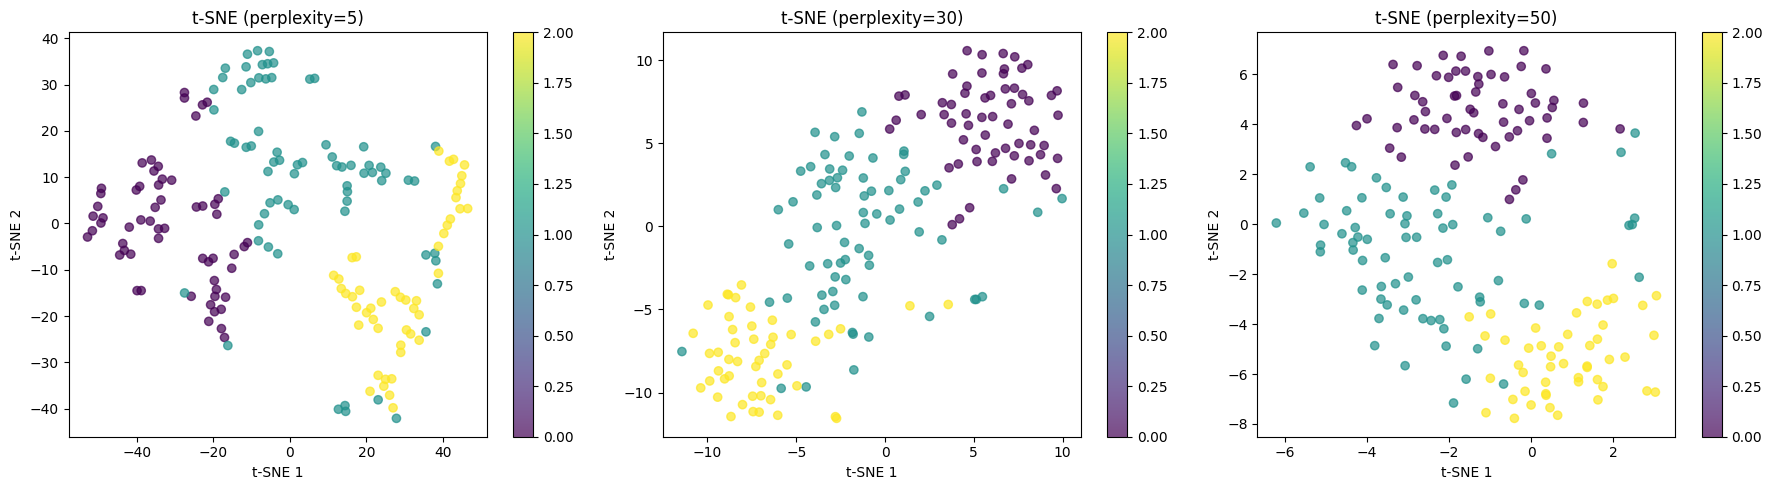


7. UMAP Visualization:


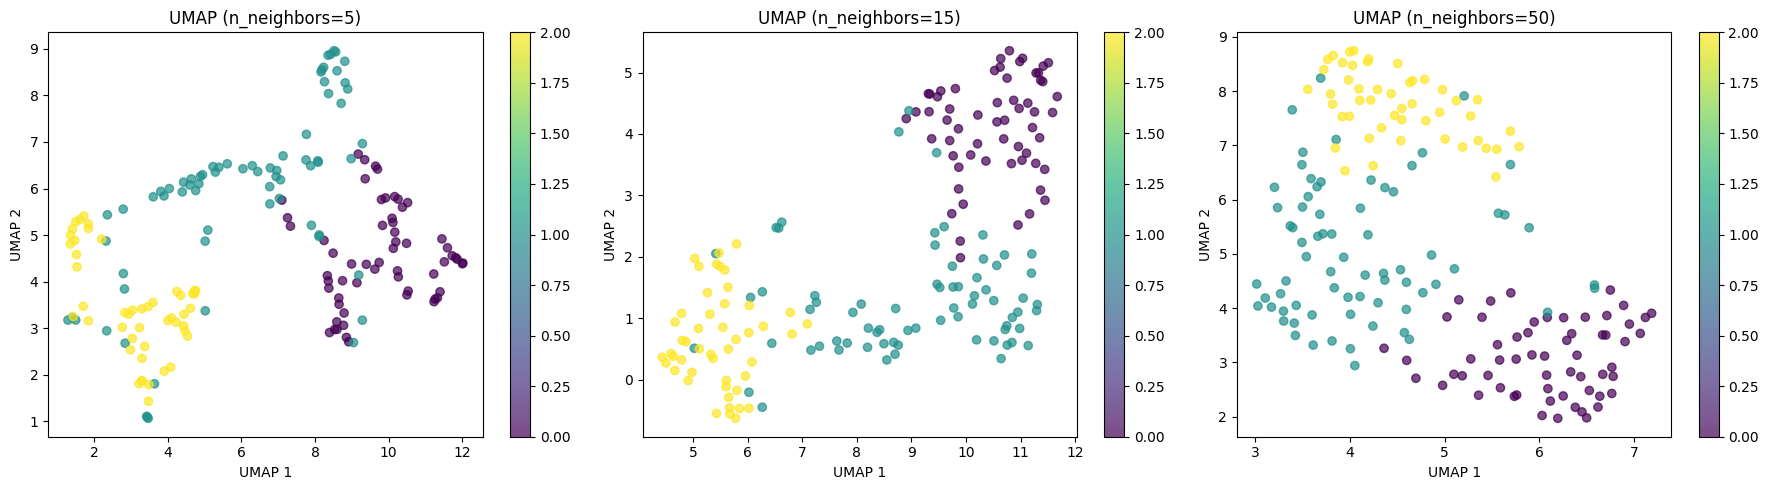


8. 3D Scatter Plot:


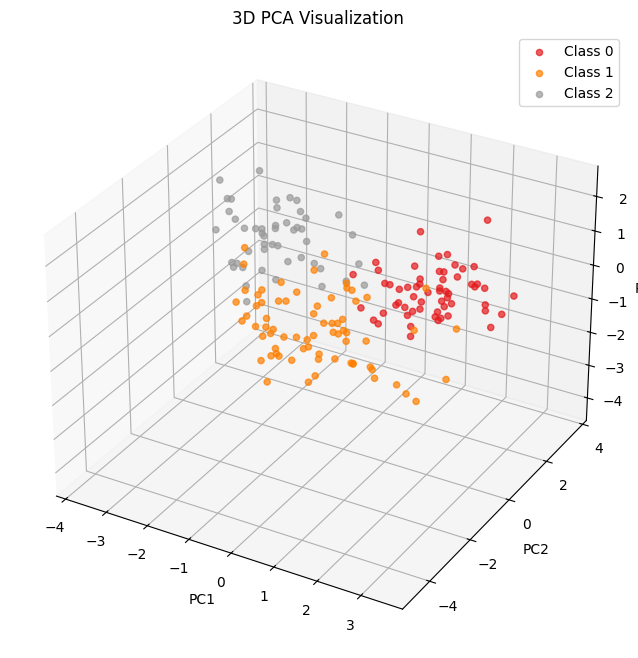


9. Andrews Curves:


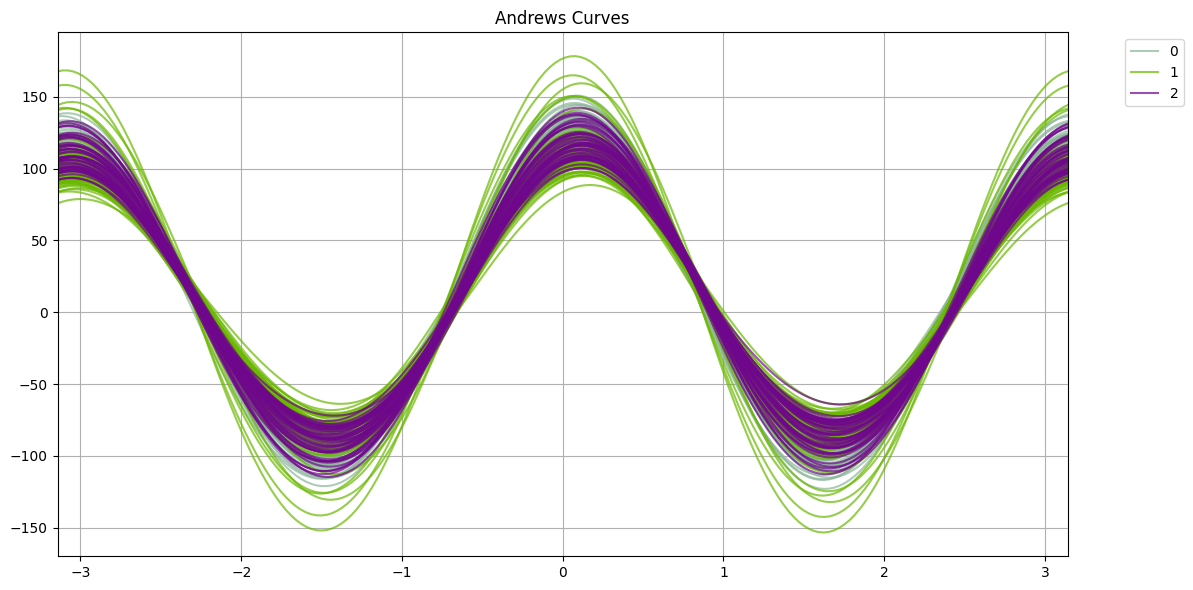


10. RadViz Plot:


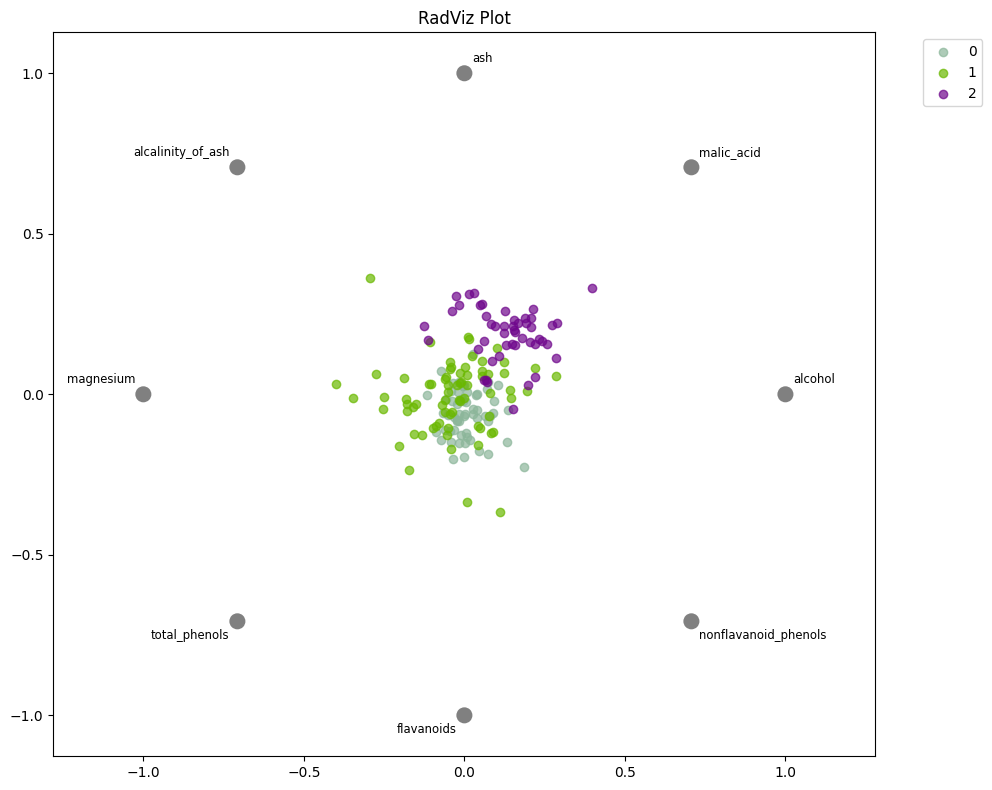


All visualizations completed!

SUMMARY OF TECHNIQUES:
1. Parallel Coordinates - Shows all dimensions simultaneously
2. Radar/Spider Plots - Circular representation of multidimensional data
3. Scatterplot Matrix - Pairwise relationships between all features
4. Correlation Heatmap - Feature correlation patterns
5. PCA - Linear dimensionality reduction
6. t-SNE - Non-linear dimensionality reduction (local structure)
7. UMAP - Non-linear dimensionality reduction (global + local)
8. 3D Scatter - Three-dimensional representation
9. Andrews Curves - Functional representation of data points
10. RadViz - Radial visualization technique


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Generate sample multidimensional data
def generate_sample_data(n_samples=1000, n_features=8, n_classes=3):
    """Generate sample high-dimensional data for visualization"""
    X, y = make_classification(
        n_samples=n_samples, 
        n_features=n_features, 
        n_informative=n_features-2,
        n_redundant=2, 
        n_classes=n_classes, 
        n_clusters_per_class=1,
        random_state=42
    )
    
    # Create feature names
    feature_names = [f'Feature_{i+1}' for i in range(n_features)]
    
    # Create DataFrame
    df = pd.DataFrame(X, columns=feature_names)
    df['Class'] = y
    
    return df, feature_names

# Load real dataset (Wine dataset - 13 features)
def load_real_data():
    """Load wine dataset as real example"""
    wine = load_wine()
    df = pd.DataFrame(wine.data, columns=wine.feature_names)
    df['Class'] = wine.target
    
    # Select subset of features for demonstration
    selected_features = wine.feature_names[:8]  # Use first 8 features
    df_subset = df[list(selected_features) + ['Class']]
    
    return df_subset, selected_features

# 1. Parallel Coordinates Plot
def parallel_coordinates_plot(df, features, class_col='Class'):
    """Create parallel coordinates plot"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Matplotlib version
    from pandas.plotting import parallel_coordinates
    parallel_coordinates(df, class_col, ax=ax1, alpha=0.7)
    ax1.set_title('Parallel Coordinates Plot (Matplotlib)')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Plotly version (more interactive)
    df_scaled = df.copy()
    scaler = StandardScaler()
    df_scaled[features] = scaler.fit_transform(df[features])
    
    fig_plotly = px.parallel_coordinates(
        df_scaled, 
        dimensions=features,
        color=class_col,
        title="Interactive Parallel Coordinates Plot"
    )
    
    plt.tight_layout()
    plt.show()
    fig_plotly.show()

# 2. Radar/Spider Plot
def radar_plot(df, features, class_col='Class', n_samples=5):
    """Create radar plots for each class"""
    classes = df[class_col].unique()
    n_features = len(features)
    
    # Calculate angles for radar plot
    angles = np.linspace(0, 2 * np.pi, n_features, endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    fig, axes = plt.subplots(1, len(classes), figsize=(5*len(classes), 5), subplot_kw=dict(projection='polar'))
    if len(classes) == 1:
        axes = [axes]
    
    # Normalize data for better visualization
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[features] = scaler.fit_transform(df[features])
    
    for idx, class_val in enumerate(classes):
        ax = axes[idx]
        class_data = df_scaled[df_scaled[class_col] == class_val]
        
        # Plot mean values for the class
        mean_values = class_data[features].mean().tolist()
        mean_values += mean_values[:1]  # Complete the circle
        
        ax.plot(angles, mean_values, 'o-', linewidth=2, label=f'Mean Class {class_val}')
        ax.fill(angles, mean_values, alpha=0.25)
        
        # Plot individual samples (limited number)
        for i in range(min(n_samples, len(class_data))):
            sample_values = class_data[features].iloc[i].tolist()
            sample_values += sample_values[:1]
            ax.plot(angles, sample_values, alpha=0.3, linewidth=0.5)
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features)
        ax.set_title(f'Class {class_val} Radar Plot')
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# 3. Scatterplot Matrix (Pairwise plots)
def scatterplot_matrix(df, features, class_col='Class'):
    """Create scatterplot matrix"""
    # Using seaborn pairplot
    plt.figure(figsize=(12, 10))
    g = sns.pairplot(df[features + [class_col]], hue=class_col, diag_kind='hist', alpha=0.7)
    g.fig.suptitle('Scatterplot Matrix', y=1.02)
    plt.show()

# 4. Correlation Heatmap with Hierarchical Clustering
def correlation_heatmap(df, features):
    """Create correlation heatmap with clustering"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Standard correlation heatmap
    corr_matrix = df[features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax1)
    ax1.set_title('Feature Correlation Heatmap')
    
    # Clustered heatmap
    sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', center=0, figsize=(8, 6))
    plt.show()

# 5. Principal Component Analysis (PCA) Visualization
def pca_visualization(df, features, class_col='Class'):
    """Visualize data using PCA"""
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    
    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Explained variance ratio
    axes[0, 0].bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
    axes[0, 0].set_xlabel('Principal Component')
    axes[0, 0].set_ylabel('Explained Variance Ratio')
    axes[0, 0].set_title('PCA Explained Variance')
    
    # 2. Cumulative explained variance
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    axes[0, 1].plot(range(1, len(cumvar) + 1), cumvar, 'bo-')
    axes[0, 1].axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
    axes[0, 1].set_xlabel('Number of Components')
    axes[0, 1].set_ylabel('Cumulative Explained Variance')
    axes[0, 1].set_title('Cumulative Explained Variance')
    axes[0, 1].legend()
    
    # 3. PC1 vs PC2
    scatter = axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=df[class_col], alpha=0.7)
    axes[1, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    axes[1, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    axes[1, 0].set_title('First Two Principal Components')
    plt.colorbar(scatter, ax=axes[1, 0])
    
    # 4. PC1 vs PC3
    scatter2 = axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 2], c=df[class_col], alpha=0.7)
    axes[1, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    axes[1, 1].set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} variance)')
    axes[1, 1].set_title('PC1 vs PC3')
    plt.colorbar(scatter2, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    return pca, X_pca

# 6. t-SNE Visualization
def tsne_visualization(df, features, class_col='Class'):
    """Visualize data using t-SNE"""
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    
    # Apply t-SNE with different perplexity values
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    perplexities = [5, 30, 50]
    
    for i, perp in enumerate(perplexities):
        tsne = TSNE(n_components=2, perplexity=perp, random_state=42, n_iter=1000)
        X_tsne = tsne.fit_transform(X_scaled)
        
        scatter = axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df[class_col], alpha=0.7)
        axes[i].set_title(f't-SNE (perplexity={perp})')
        axes[i].set_xlabel('t-SNE 1')
        axes[i].set_ylabel('t-SNE 2')
        plt.colorbar(scatter, ax=axes[i])
    
    plt.tight_layout()
    plt.show()

# 7. UMAP Visualization
def umap_visualization(df, features, class_col='Class'):
    """Visualize data using UMAP"""
    try:
        import umap
        
        # Standardize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df[features])
        
        # Apply UMAP with different parameters
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        n_neighbors_list = [5, 15, 50]
        
        for i, n_neighbors in enumerate(n_neighbors_list):
            reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
            X_umap = reducer.fit_transform(X_scaled)
            
            scatter = axes[i].scatter(X_umap[:, 0], X_umap[:, 1], c=df[class_col], alpha=0.7)
            axes[i].set_title(f'UMAP (n_neighbors={n_neighbors})')
            axes[i].set_xlabel('UMAP 1')
            axes[i].set_ylabel('UMAP 2')
            plt.colorbar(scatter, ax=axes[i])
        
        plt.tight_layout()
        plt.show()
        
    except ImportError:
        print("UMAP not installed. Install with: pip install umap-learn")

# 8. 3D Scatter Plot (using first 3 PCs or features)
def plot_3d_scatter(df, features, class_col='Class', use_pca=True):
    """Create 3D scatter plot"""
    if use_pca:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df[features])
        pca = PCA(n_components=3)
        coords = pca.fit_transform(X_scaled)
        labels = ['PC1', 'PC2', 'PC3']
        title = '3D PCA Visualization'
    else:
        coords = df[features[:3]].values
        labels = features[:3]
        title = '3D Feature Visualization'
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    classes = df[class_col].unique()
    colors = plt.cm.Set1(np.linspace(0, 1, len(classes)))
    
    for i, class_val in enumerate(classes):
        mask = df[class_col] == class_val
        ax.scatter(coords[mask, 0], coords[mask, 1], coords[mask, 2], 
                  c=[colors[i]], label=f'Class {class_val}', alpha=0.7)
    
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.set_title(title)
    ax.legend()
    
    plt.show()

# 9. Andrews Curves
def andrews_curves_plot(df, features, class_col='Class'):
    """Create Andrews curves"""
    from pandas.plotting import andrews_curves
    
    plt.figure(figsize=(12, 6))
    andrews_curves(df[features + [class_col]], class_col, alpha=0.7)
    plt.title('Andrews Curves')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 10. Radviz Plot
def radviz_plot(df, features, class_col='Class'):
    """Create RadViz plot"""
    from pandas.plotting import radviz
    
    plt.figure(figsize=(10, 8))
    radviz(df[features + [class_col]], class_col, alpha=0.7)
    plt.title('RadViz Plot')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Generating multidimensional visualization examples...")
    
    # Generate sample data
    print("\n1. Using synthetic data (8 dimensions, 3 classes):")
    df_synthetic, features_synthetic = generate_sample_data(n_samples=500, n_features=8, n_classes=3)
    
    # Load real data
    print("\n2. Using Wine dataset (8 selected features):")
    df_wine, features_wine = load_real_data()
    
    # Choose dataset for demonstrations
    df = df_wine
    features = features_wine
    
    print(f"\nDataset shape: {df.shape}")
    print(f"Features: {features}")
    print(f"Classes: {df['Class'].unique()}")
    
    # Create visualizations
    print("\n" + "="*50)
    print("MULTIDIMENSIONAL DATA VISUALIZATIONS")
    print("="*50)
    
    # 1. Parallel Coordinates
    print("\n1. Parallel Coordinates Plot:")
    parallel_coordinates_plot(df, features)
    
    # 2. Radar Plot
    print("\n2. Radar/Spider Plot:")
    radar_plot(df, features[:6], n_samples=3)  # Limit features for clarity
    
    # 3. Scatterplot Matrix
    #print("\n3. Scatterplot Matrix:")
    #scatterplot_matrix(df, features[:5])  # Limit for readability
    
    # 4. Correlation Heatmap
    print("\n4. Correlation Heatmap:")
    correlation_heatmap(df, features)
    
    # 5. PCA Visualization
    print("\n5. PCA Visualization:")
    pca, X_pca = pca_visualization(df, features)
    
    # 6. t-SNE Visualization
    print("\n6. t-SNE Visualization:")
    tsne_visualization(df, features)
    
    # 7. UMAP Visualization
    print("\n7. UMAP Visualization:")
    umap_visualization(df, features)
    
    # 8. 3D Scatter Plot
    print("\n8. 3D Scatter Plot:")
    plot_3d_scatter(df, features, use_pca=True)
    
    # 9. Andrews Curves
    print("\n9. Andrews Curves:")
    andrews_curves_plot(df, features)
    
    # 10. RadViz Plot
    print("\n10. RadViz Plot:")
    radviz_plot(df, features)
    
    print("\n" + "="*50)
    print("All visualizations completed!")
    print("="*50)
    
    # Summary of techniques
    print("\nSUMMARY OF TECHNIQUES:")
    print("1. Parallel Coordinates - Shows all dimensions simultaneously")
    print("2. Radar/Spider Plots - Circular representation of multidimensional data") 
    print("3. Scatterplot Matrix - Pairwise relationships between all features")
    print("4. Correlation Heatmap - Feature correlation patterns")
    print("5. PCA - Linear dimensionality reduction")
    print("6. t-SNE - Non-linear dimensionality reduction (local structure)")
    print("7. UMAP - Non-linear dimensionality reduction (global + local)")
    print("8. 3D Scatter - Three-dimensional representation")
    print("9. Andrews Curves - Functional representation of data points")
    print("10. RadViz - Radial visualization technique")

In [3]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,0
...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,2
